In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv(r"C:\Users\priye\Downloads\Global Terrorism - START data\globalterrorismdb_0718dist.csv",encoding = 'ISO-8859-1')

In [3]:
dataset

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
dataset.shape

(181691, 135)

In [6]:
dataset.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
dataset.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country',
                        'region_txt':'Region', 'provstate':'State', 'city':'City', 'attacktype1_txt':'Attack_type', 
                        'targsubtype1_txt':'Target_subtype', 'gname':'Group', 'motive':'Motive', 
                        'weaptype1_txt':'Weapon_type', 'nkill':'Killed', 'nwound':'Wounded' }, inplace=True)

In [8]:
dataset1 = dataset[['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City', 'latitude', 'longitude','Killed',
                   'Wounded', 'Group', 'Attack_type', 'Motive', 'Target_subtype', 'Weapon_type']]

In [9]:
dataset1.head()

,Year,Month,Day,Country,Region,State,City,latitude,longitude,Killed,Wounded,Group,Attack_type,Motive,Target_subtype,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0.0,MANO-D,Assassination,NaN,Named Civilian,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0.0,0.0,23rd of September Communist League,Hostage Taking (Kidnapping),NaN,"Diplomatic Personnel (outside of embassy, cons...",Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1.0,0.0,Unknown,Assassination,NaN,Radio Journalist/Staff/Facility,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Unknown,Bombing/Explosion,NaN,Embassy/Consulate,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Unknown,Facility/Infrastructure Attack,NaN,Embassy/Consulate,Incendiary


In [10]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Month           181691 non-null  int64  
 2   Day             181691 non-null  int64  
 3   Country         181691 non-null  object 
 4   Region          181691 non-null  object 
 5   State           181270 non-null  object 
 6   City            181257 non-null  object 
 7   latitude        177135 non-null  float64
 8   longitude       177134 non-null  float64
 9   Killed          171378 non-null  float64
 10  Wounded         165380 non-null  float64
 11  Group           181691 non-null  object 
 12  Attack_type     181691 non-null  object 
 13  Motive          50561 non-null   object 
 14  Target_subtype  171318 non-null  object 
 15  Weapon_type     181691 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage: 22.2+ M

In [11]:
dataset1.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
State                421
City                 434
latitude            4556
longitude           4557
Killed             10313
Wounded            16311
Group                  0
Attack_type            0
Motive            131130
Target_subtype     10373
Weapon_type            0
dtype: int64

In [12]:
dataset1['Killed'] = dataset1['Killed'].fillna(0)
dataset1['Wounded'] = dataset1['Wounded'].fillna(0)
dataset1['Casualties'] = dataset1['Killed']+dataset1['Wounded']

In [13]:
dataset1

,Year,Month,Day,Country,Region,State,City,latitude,longitude,Killed,Wounded,Group,Attack_type,Motive,Target_subtype,Weapon_type,Casualties
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0.0,MANO-D,Assassination,NaN,Named Civilian,Unknown,1.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0.0,0.0,23rd of September Communist League,Hostage Taking (Kidnapping),NaN,"Diplomatic Personnel (outside of embassy, cons...",Unknown,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1.0,0.0,Unknown,Assassination,NaN,Radio Journalist/Staff/Facility,Unknown,1.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0.0,0.0,Unknown,Bombing/Explosion,NaN,Embassy/Consulate,Explosives,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0.0,0.0,Unknown,Facility/Infrastructure Attack,NaN,Embassy/Consulate,Incendiary,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,1.0,2.0,Al-Shabaab,Armed Assault,NaN,Military Checkpoint,Firearms,3.0
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,2.0,7.0,Muslim extremists,Bombing/Explosion,NaN,Military Barracks/Base/Headquarters/Checkpost,Explosives,9.0
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,0.0,0.0,Bangsamoro Islamic Freedom Movement (BIFM),Facility/Infrastructure Attack,NaN,House/Apartment/Residence,Incendiary,0.0
181689,2017,12,31,India,South Asia,Manipur,Imphal,24.798346,93.940430,0.0,0.0,Unknown,Bombing/Explosion,NaN,Government Building/Facility/Office,Explosives,0.0


In [14]:
dataset1.shape

(181691, 17)

In [15]:
dataset1.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,Casualties
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


<AxesSubplot: >

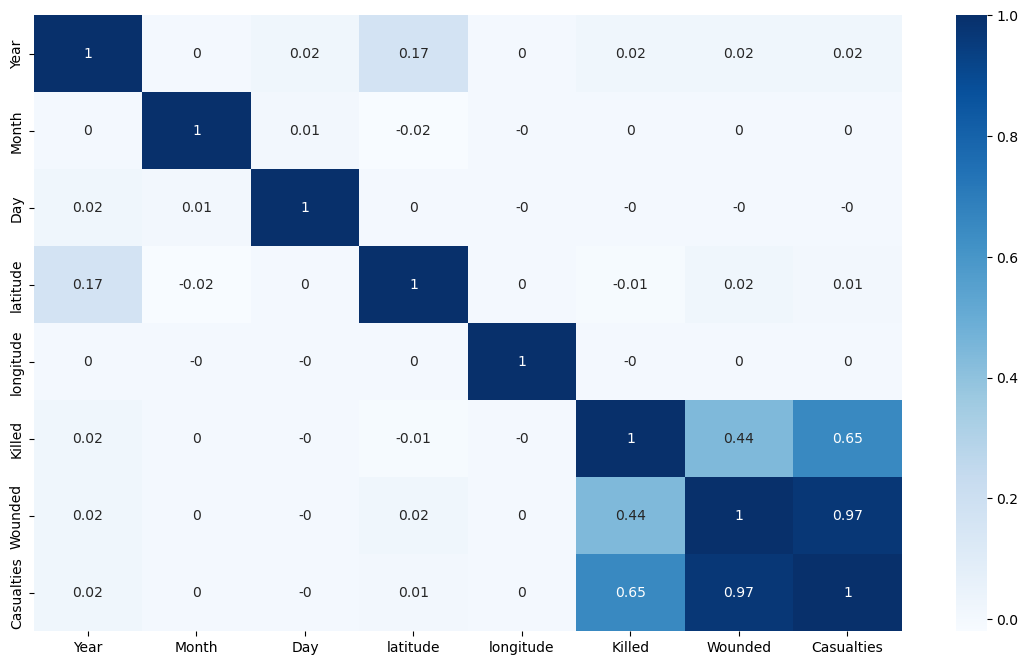

In [16]:
plt.figure(figsize=(14,8))
sns.heatmap(np.round(dataset1.corr(), 2),annot=True,cmap='Blues')

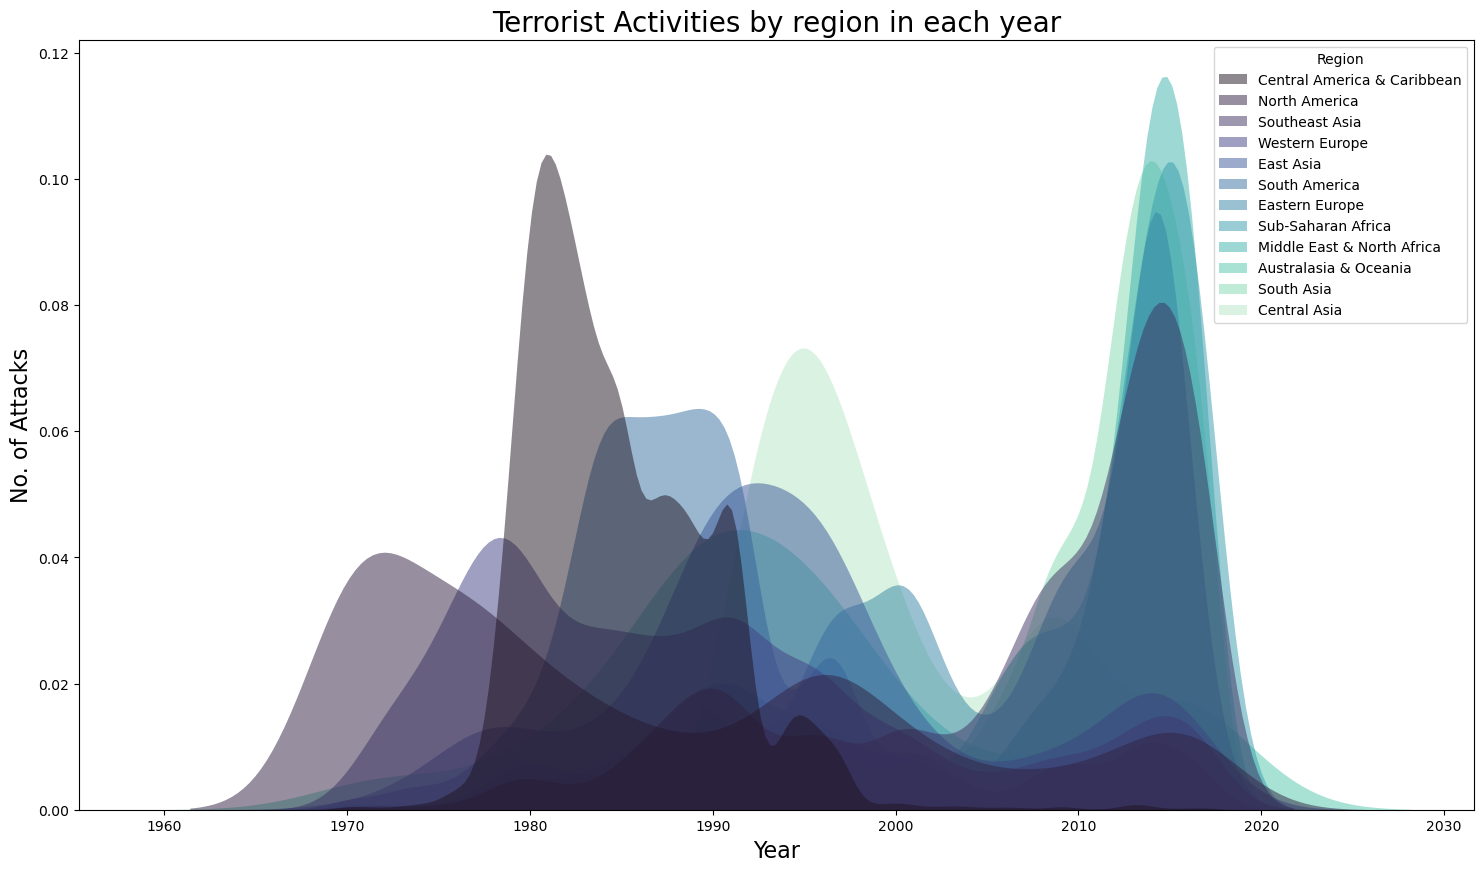

In [17]:
plt.figure(figsize=(18,10))
sns.kdeplot(data=dataset1, x='Year', hue='Region', fill=True, palette='mako', 
            common_norm=False, alpha=.5, linewidth=0)
plt.title('Terrorist Activities by region in each year',fontsize=20)
plt.xlabel('Year',fontsize=16)
plt.ylabel('No. of Attacks',fontsize=16)
plt.show()

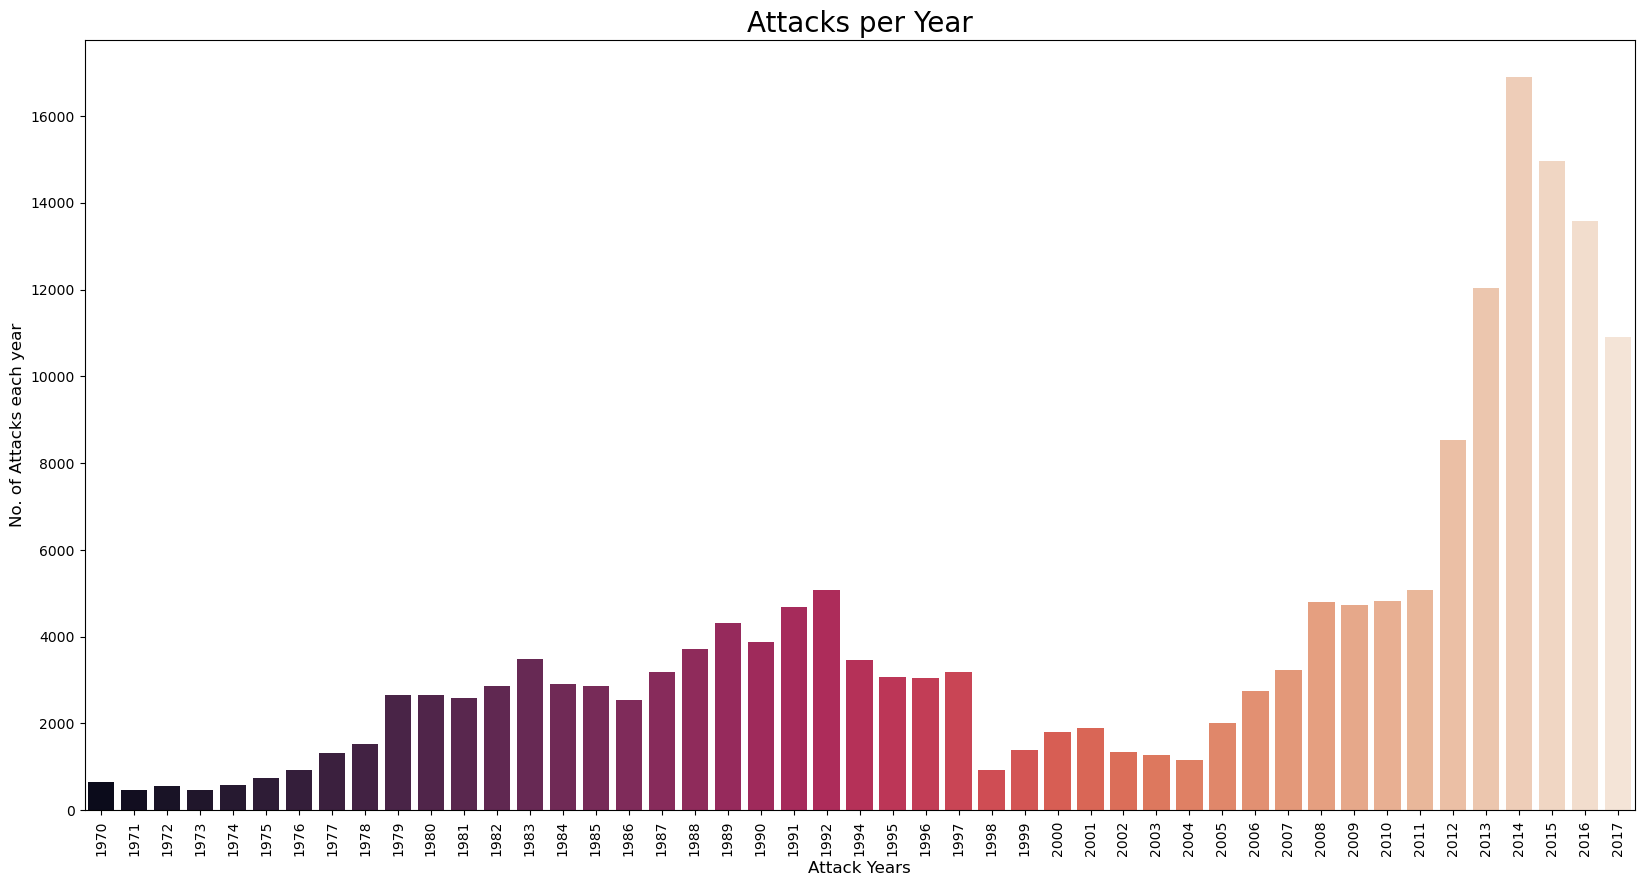

In [18]:
year=dataset1['Year'].unique()
year_count=dataset1['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(20,10))
sns.barplot(x=year,y=year_count,palette='rocket')
plt.title('Attacks per Year',fontsize = 20)
plt.xlabel('Attack Years', fontsize= 12)
plt.ylabel('No. of Attacks each year', fontsize=12)
plt.xticks(rotation=90)
plt.show()

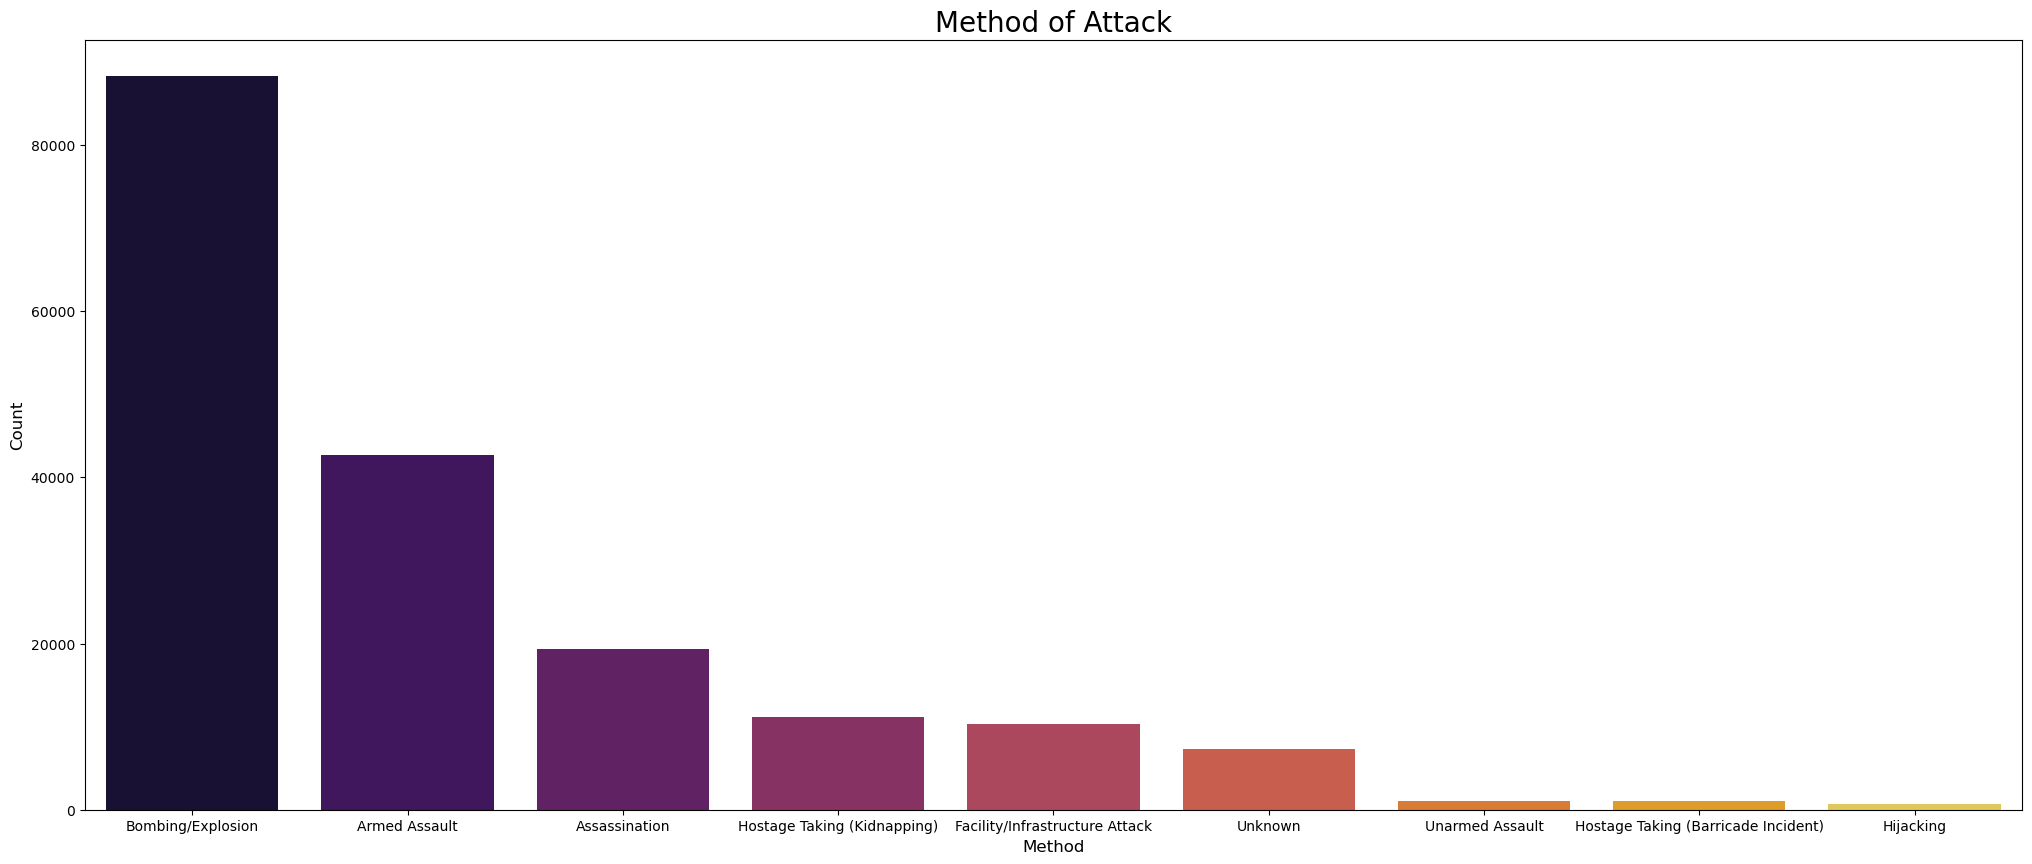

In [19]:
X = dataset1['Attack_type'].value_counts()[:15].index
Y = dataset1['Attack_type'].value_counts()[:15].values
plt.subplots(figsize=(25,10))
sns.barplot(x=X, y=Y, palette='inferno')
plt.title('Method of Attack', fontsize=20)
plt.xlabel('Method', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

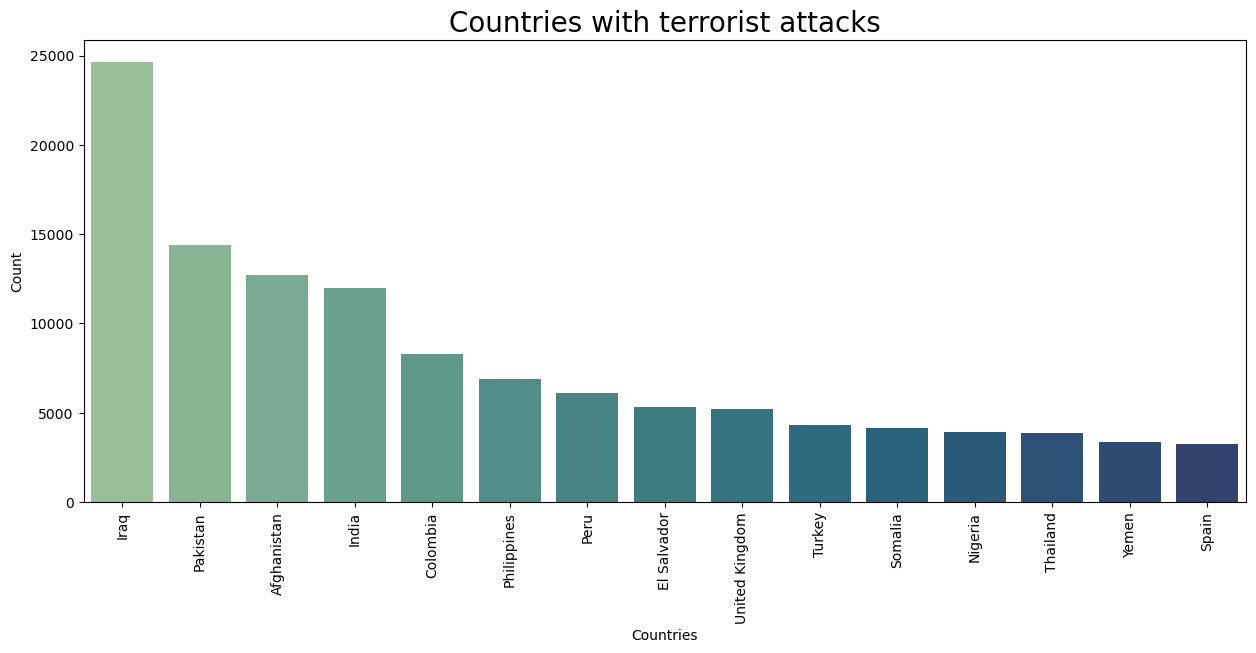

In [20]:
X = dataset1['Country'].value_counts()[:15].index
Y=dataset1['Country'].value_counts().values[:15]
plt.subplots(figsize=(15,6))
sns.barplot(x=X, y=Y, palette='crest')
plt.title('Countries with terrorist attacks', fontsize=20)
plt.xlabel('Countries', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Count')

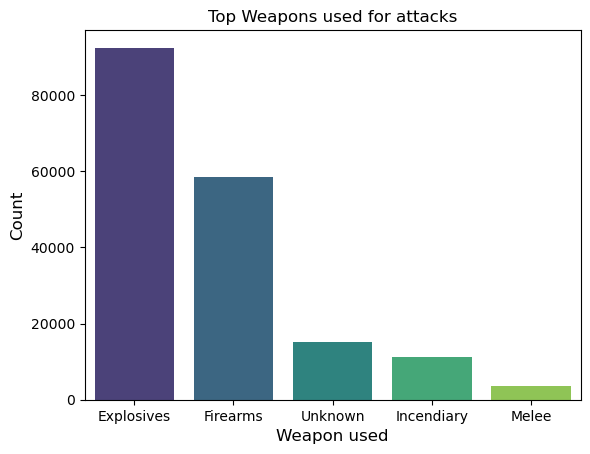

In [21]:
X=dataset1['Weapon_type'].value_counts()[:5].index
Y=dataset1['Weapon_type'].value_counts()[:5].values
sns.barplot(x=X, y=Y, palette='viridis')
plt.title('Top Weapons used for attacks')
plt.xlabel('Weapon used', fontsize=12)
plt.ylabel('Count', fontsize=12)

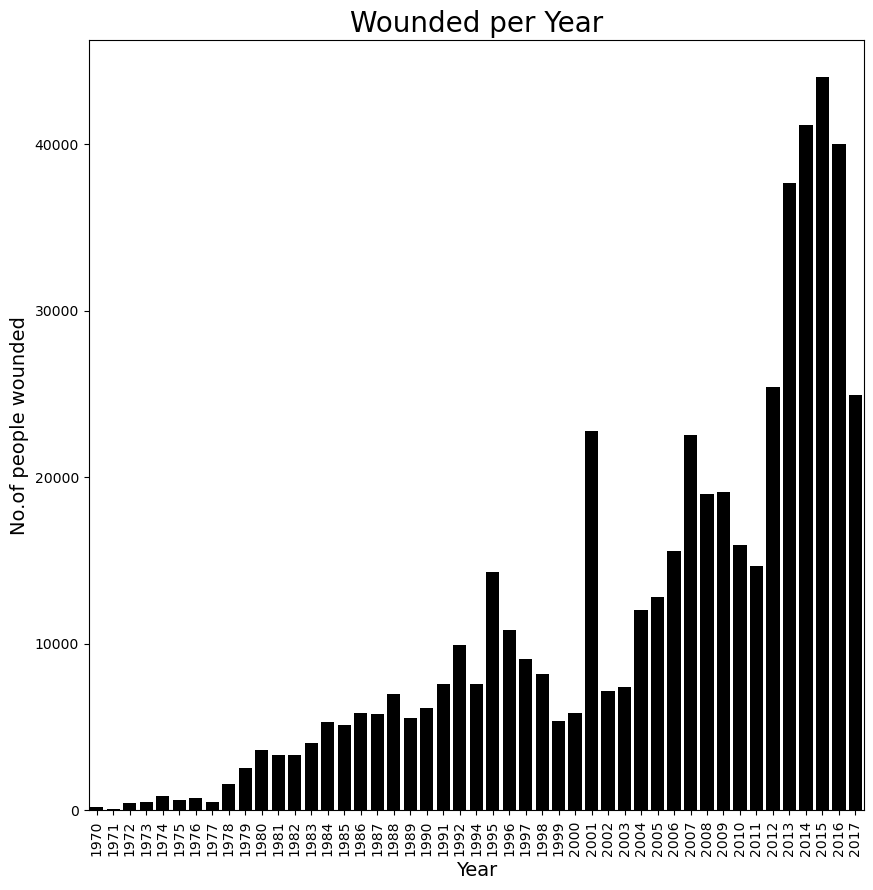

In [22]:
X = dataset1.groupby(['Year'])['Wounded'].sum().index
Y = dataset1.groupby(['Year'])['Wounded'].sum().values
sns.barplot(x=X, y=Y, color='black')
plt.title('Wounded per Year', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('No.of people wounded', fontsize=14)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,10)

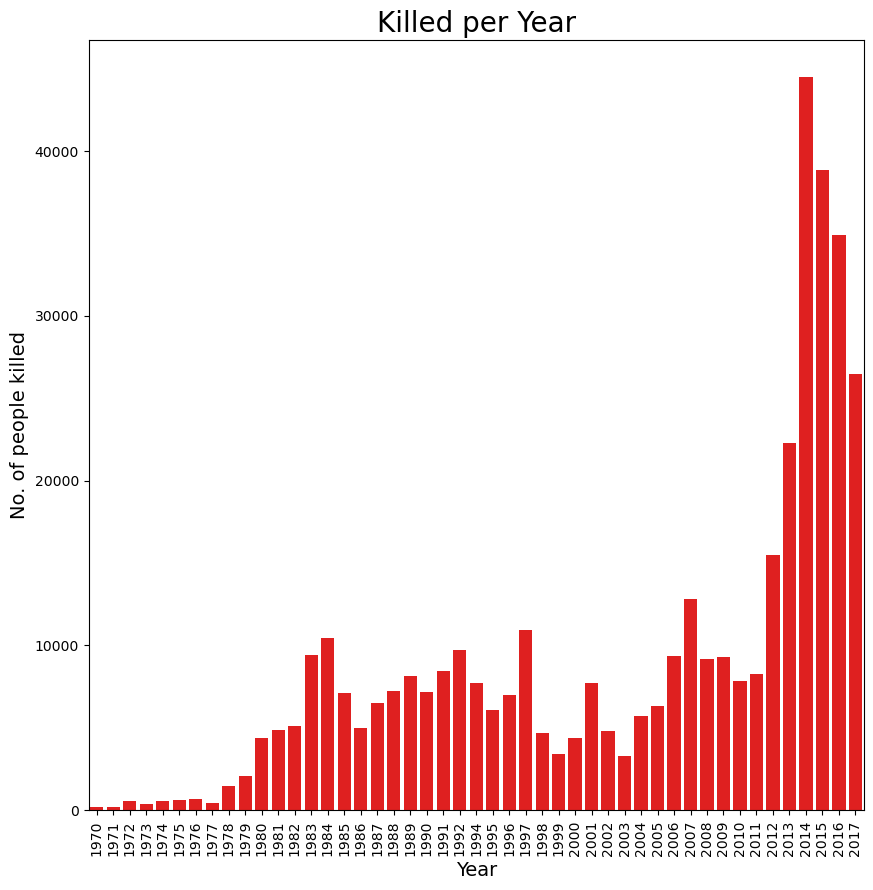

In [23]:
X = dataset1.groupby(['Year'])['Killed'].sum().index
Y = dataset1.groupby(['Year'])['Killed'].sum().values
sns.barplot(x=X, y=Y, color='red')
plt.title('Killed per Year', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('No. of people killed', fontsize=14)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,10)

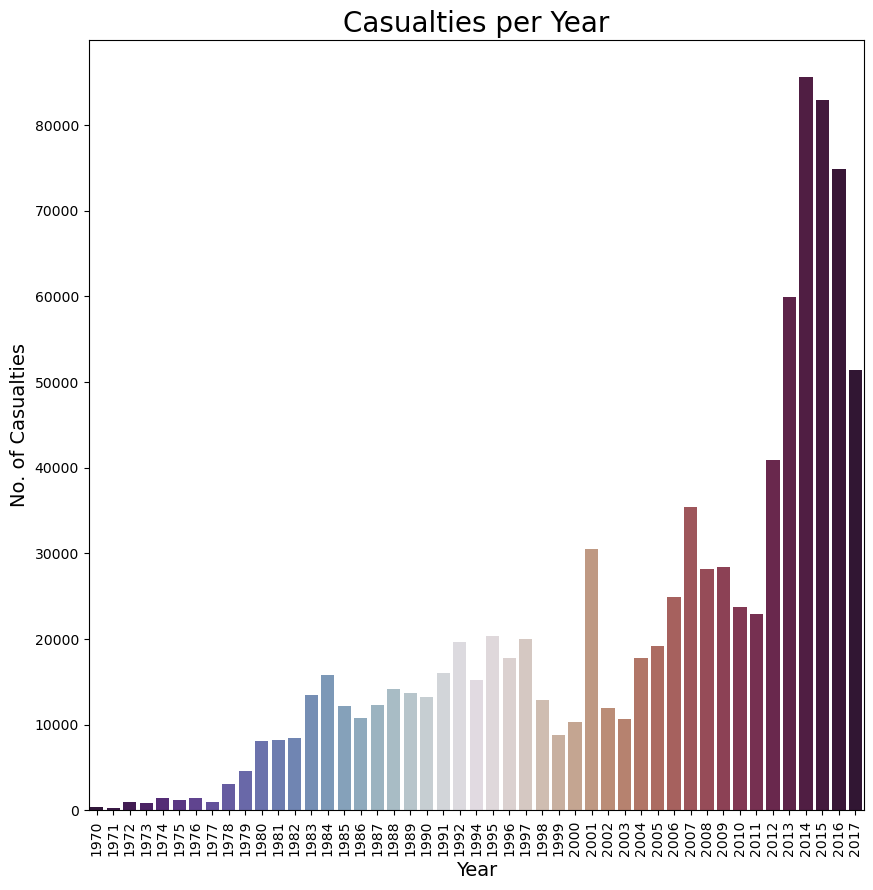

In [24]:
X = dataset1.groupby(['Year'])['Casualties'].sum().index
Y = dataset1.groupby(['Year'])['Casualties'].sum().values
sns.barplot(x=X, y=Y, palette='twilight_shifted')
plt.title('Casualties per Year', fontsize=20)
plt.xlabel('Year',fontsize=14)
plt.ylabel('No. of Casualties',fontsize=14)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,10)

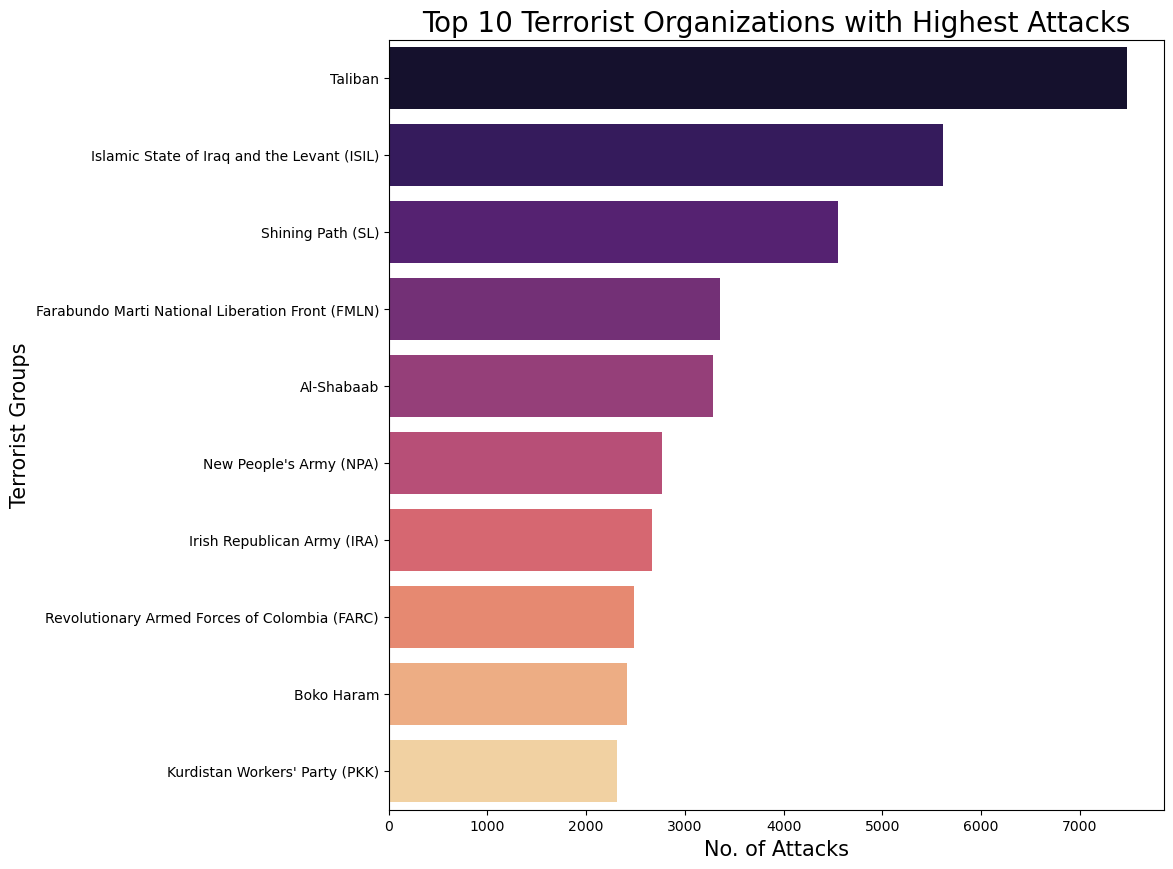

In [25]:
X = dataset1['Group'].value_counts()[1:11].values
Y = dataset1['Group'].value_counts()[1:11].index
sns.barplot(x=X, y=Y, palette='magma')
plt.title('Top 10 Terrorist Organizations with Highest Attacks', fontsize=20)
plt.xlabel('No. of Attacks', fontsize=15)
plt.ylabel('Terrorist Groups', fontsize=15)
plt.gcf().set_size_inches(10,10)

### CONCLUSION:
#### 1. The year 2004 faced most no. of attacks.
#### 2. The methods used in most attacks are Bombing/Explosions.
#### 3. Iraq is the most affected country followed by Pakistan, Afghanistan & India.
#### 4. Taliban is the group with highest attacks. ISIL & SL are next in the list.
#### 5. The years 2015, 2015 & 2016 are the years with most casualties.